In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import math
import seaborn as sns

In [2]:
data = pd.read_excel('Linear Regression.xlsx',sheet_name=0)

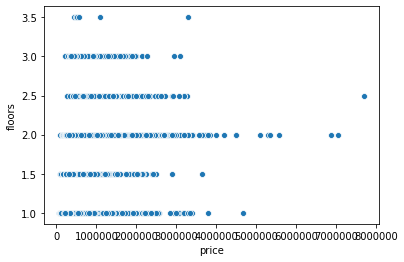

In [3]:
df_x= data[['price']]
df_y = data[['floors']]
sns.scatterplot(df_x['price'],df_y['floors'])

In [4]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 1/3, random_state = 0)

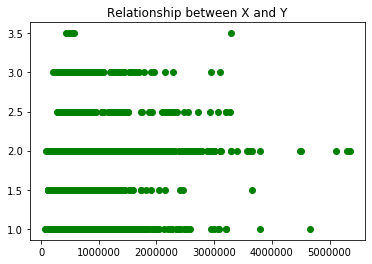

In [5]:
plt.title('Relationship between X and Y')
plt.scatter(x_train, y_train,  color='green')
plt.show()

In [6]:
#Model Building with sklearn
# Create linear regression object
lm = linear_model.LinearRegression()
# ... then fir it
# Train the model
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lm.coef_

array([[3.86582296e-07]])

In [8]:
lm.intercept_

array([1.2905107])

In [9]:
# Have a look at R sq to give an idea of the fit 
print('R sq: ',lm.score(x_train,y_train))

R sq:  0.066128245933472


In [10]:
# and so the correlation is..
print('Correlation: ', math.sqrt(lm.score(x_train,y_train)))

Correlation:  0.25715412875058413


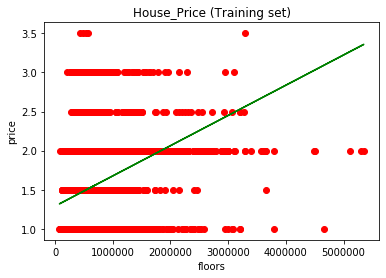

In [11]:
#Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lm.predict(x_train), color = 'green')
plt.title('House_Price (Training set)')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [12]:
#Test the model
ypred=lm.predict(x_test)
ypred.size

7205

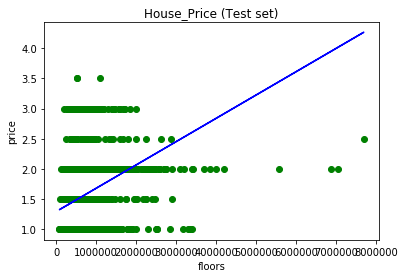

In [13]:
# Visualise Test set result
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lm.predict(x_test), color = 'blue')
plt.title('House_Price (Test set)')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [14]:
#estimate the cost
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.06472556030115528
The RMSE value is........ 0.5181200272227835


In [15]:
#Creating our First Regression
#Acoourding to Linear equation add constant to x i.e dependent variable
x = sm.add_constant(df_x) #Untrained data

In [16]:
#ordinary least squares regression(OLS)
results = sm.OLS(df_y,x).fit() # Untrain data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 floors   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1526.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.58e-322
Time:                        13:37:34   Log-Likelihood:                -16612.
No. Observations:               21613   AIC:                         3.323e+04
Df Residuals:                   21611   BIC:                         3.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2903      0.006    204.331      0.000       1.278       1.303
price       3.777e-07   9.67e-09     39.060      0.000    3.59e-07    3.97e-07
==============================================================================
Omnibus:                     1310.048   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1561.096
Skew:                           0.657   Prob(JB):                         0.00
Kurtosis:                       2.911   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

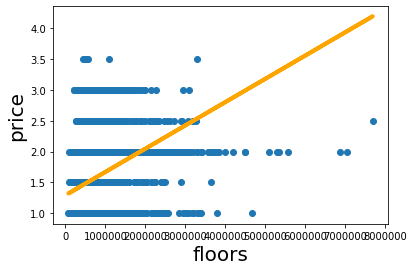

In [17]:
plt.scatter(df_x,df_y)
 
yhat = (3.777e-07*df_x) + 1.2903
plt.plot(df_x,yhat, lw=4, c="orange", label = "regression line")
 
plt.xlabel("floors", fontsize = 20)
 
plt.ylabel("price", fontsize = 20)
 
plt.show()